# Figure notebook

### dependencies and settings

In [1]:
# standard libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import seaborn as sns

from PendantProp.analysis.models import szyszkowski_model
from PendantProp.analysis.utils import fit_model, calc_st_at_cmc

# set latex font for plots
plt.rc("text", usetex=True)

ModuleNotFoundError: No module named 'seaborn'

### import data

In [59]:
experiment_tag = "AULAB_PSP0075"
solution = "C12E4"
results = pd.read_csv(f"experiments/{experiment_tag}/results.csv")
results_solution = results[results["solution"]==solution]
point_types = results_solution["point type"]

# Handpick remove outlier
# results_solution = results_solution[results_solution["well id"] != "7F9"]
# results_solution = results_solution[results_solution["well id"] != "7F10"]
# results_solution = results_solution[results_solution["well id"] != "7F11"]
# results_solution = results_solution[results_solution["well id"] != "7F12"]

display(results_solution)

,well id,solution,concentration,point type,surface tension eq. (mN/m),drop count,drop volume (uL),max measure time (s),flow rate (uL/s),temperature (C),humidity (%),pressure (Pa)
57,7F8,C12E4,0.002852,explore,69.481172,1,10.25,900.0,0.5,22.63,21.51,102197.00
58,7F7,C12E4,0.005703,explore,63.646951,1,10.25,900.0,0.5,22.59,21.64,102197.03
59,7F6,C12E4,0.011406,explore,44.446755,4,7.00,900.0,0.5,22.57,21.65,102168.74
60,7F5,C12E4,0.022812,explore,38.149729,4,5.50,900.0,0.5,22.54,21.76,102151.57
61,7F4,C12E4,0.045625,explore,33.485409,3,5.50,900.0,0.5,22.50,21.82,102138.38
62,7F3,C12E4,0.091250,explore,29.841982,3,4.50,900.0,0.5,22.49,21.90,102117.61
63,7F2,C12E4,0.182500,explore,28.162174,2,4.75,900.0,0.5,22.46,21.98,102092.70
64,7F9,C12E4,0.025297,exploit,35.137276,3,6.25,900.0,0.5,22.50,22.17,102092.03
65,7F10,C12E4,0.028267,exploit,43.714239,4,6.50,900.0,0.5,22.46,22.53,102096.38
66,7F11,C12E4,0.033575,exploit,41.198554,4,6.25,900.0,0.5,22.43,22.85,102105.11


### Fit model

In [60]:
c = results_solution["concentration"] / 1000
st = results_solution["surface tension eq. (mN/m)"] / 1000
obs = (c, st)
parameters = ["cmc", "gamma_max", "Kad"]

post_pred, x_new = fit_model(
    obs, model=szyszkowski_model, parameters=parameters, outlier_check=True
)

# unit conversion
x_new = x_new * 1000
x_obs, y_obs = obs
x_obs = x_obs * 1000
y_obs = y_obs * 1000
st_fit_mean = post_pred["obs"].mean(axis=0) * 1000
st_fit_std = post_pred["obs"].std(axis=0) * 1000

sample: 100%|██████████| 1500/1500 [00:03<00:00, 478.09it/s, 15 steps of size 2.74e-01. acc. prob=0.68] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
        Kad  94468.49   4619.82  95665.94  87416.64  99994.45     62.95      1.01
        cmc      0.00      0.00      0.00      0.00      0.00    226.33      1.00
  gamma_max      0.00      0.00      0.00      0.00      0.00     49.11      1.00
      sigma      0.00      0.00      0.00      0.00      0.00    157.91      1.03

Number of divergences: 23
outlier detected at 1.1406250450818334e-05, datapoint 2
refitting model...


sample: 100%|██████████| 1500/1500 [00:02<00:00, 529.41it/s, 31 steps of size 1.16e-01. acc. prob=0.83]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
        Kad  84978.58  10359.85  86616.77  67636.02  99188.56    116.62      1.00
        cmc      0.00      0.00      0.00      0.00      0.00    200.00      1.00
  gamma_max      0.00      0.00      0.00      0.00      0.00     82.47      1.00
      sigma      0.00      0.00      0.00      0.00      0.00    598.12      1.00

Number of divergences: 10
outlier detected at 2.529713856347371e-05, datapoint 6
refitting model...


sample: 100%|██████████| 1500/1500 [00:02<00:00, 620.92it/s, 31 steps of size 9.18e-02. acc. prob=0.90] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
        Kad  88502.05   8320.98  90514.69  75861.30  99881.04    266.41      1.00
        cmc      0.00      0.00      0.00      0.00      0.00    407.43      1.01
  gamma_max      0.00      0.00      0.00      0.00      0.00    248.61      1.00
      sigma      0.00      0.00      0.00      0.00      0.00    588.87      1.00

Number of divergences: 2
outlier detected at 2.2812500901636668e-05, datapoint 2
refitting model...


sample: 100%|██████████| 1500/1500 [00:02<00:00, 549.54it/s, 127 steps of size 3.63e-02. acc. prob=0.95]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
        Kad  52949.31  10816.89  52209.97  33006.23  68081.71    266.41      1.00
        cmc      0.00      0.00      0.00      0.00      0.00    332.40      1.00
  gamma_max      0.00      0.00      0.00      0.00      0.00    221.52      1.00
      sigma      0.00      0.00      0.00      0.00      0.00    553.41      1.00

Number of divergences: 0
outlier detected at 0.00011706063378369436, datapoint 7
refitting model...


sample: 100%|██████████| 1500/1500 [00:02<00:00, 645.95it/s, 31 steps of size 3.95e-02. acc. prob=0.95]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
        Kad  50098.34   5473.79  49952.91  41340.58  57963.82    193.20      1.00
        cmc      0.00      0.00      0.00      0.00      0.00    303.04      1.00
  gamma_max      0.00      0.00      0.00      0.00      0.00    167.79      1.00
      sigma      0.00      0.00      0.00      0.00      0.00    265.76      1.00

Number of divergences: 0


### Plot isotherm with fit

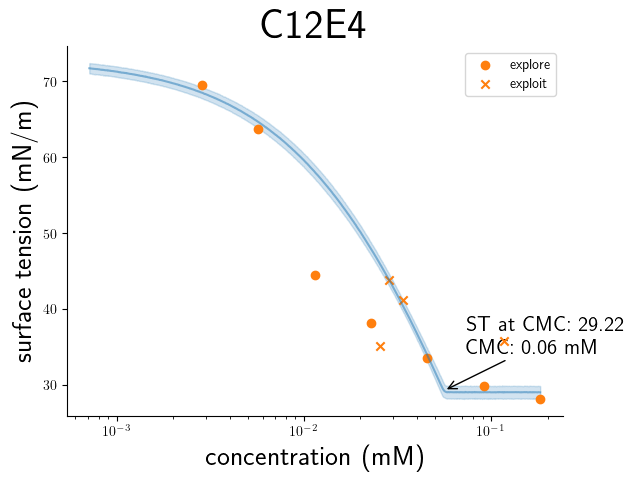

In [61]:
fig, ax1 = plt.subplots()

explore_mask = point_types == "explore"
exploit_mask = point_types == "exploit"

ax1.plot(x_new, st_fit_mean, c="C0", alpha=0.5, zorder=20)
ax1.fill_between(
    x_new,
    st_fit_mean - 2 * st_fit_std,
    st_fit_mean + 2 * st_fit_std,
    color="C0",
    alpha=0.2,
)

# Plot explore points with one marker
ax1.scatter(
    x_obs[explore_mask],
    y_obs[explore_mask],
    c="C1",
    label="explore",
    marker="o",
    zorder=15,
)

# Plot exploit points with another marker
ax1.scatter(
    x_obs[exploit_mask],
    y_obs[exploit_mask],
    c="C1",
    label="exploit",
    marker="x",
    zorder=15,
)

cmc_mean = post_pred["cmc"].mean(axis=0) * 1000
st_at_cmc, st_at_cmc_err, st_at_cmc_relative_err = calc_st_at_cmc(x_new, post_pred)
st_at_cmc = st_at_cmc * 1000
# Annotate properties
ax1.annotate(
    f"CMC: {cmc_mean:.2f} mM",
    xy=(cmc_mean, st_at_cmc),
    xytext=(cmc_mean * 1.3, st_at_cmc + 5),
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    fontsize=15,
)
ax1.annotate(
    f"ST at CMC: {st_at_cmc:.2f}",
    xy=(cmc_mean, st_at_cmc),
    xytext=(cmc_mean * 1.3, st_at_cmc + 8),
    fontsize=15,
)

# ax1.set_xlim(0.01, 3)
ax1.set_xscale("log")
ax1.set_xlabel(r"concentration (mM)", fontsize=20)
ax1.set_ylabel("surface tension (mN/m)", fontsize=20)
ax1.set_title(f"{solution}", fontsize=30)
ax1.legend()
sns.despine()

plt.savefig(f"figures/{solution}.png", dpi=100, bbox_inches="tight")

Explore with errors bars

In [76]:
experiment_tag = "AULAB_PSP0075"
solution = "CTAB"
results = pd.read_csv(f"experiments/{experiment_tag}/results.csv")
results_solution = results[results["solution"].str.contains(solution)]
results_explore = results_solution[results_solution["point type"] == "explore"]

grouped = (
    results_explore.groupby("concentration")["surface tension eq. (mN/m)"]
    .agg(["mean", "std"])
    .reset_index()
)

c = grouped["concentration"][:-1]
st_mean = grouped['mean'][:-1]
st_std = grouped['std'][:-1]

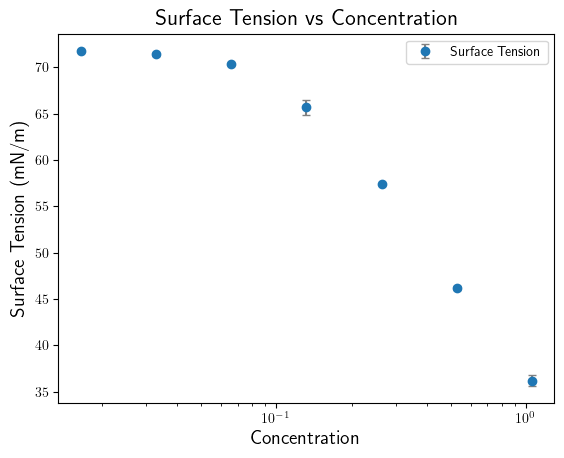

In [78]:
fig, ax = plt.subplots()

# Scatter plot with error bars
ax.errorbar(
    x=c,
    y=st_mean,
    yerr=st_std,
    fmt="o",  # Marker style for scatter points
    ecolor="gray",  # Color of error bars
    capsize=3,  # Length of error bar caps
    label="Surface Tension",
)

# Add labels and title
ax.set_xlabel("Concentration", fontsize=14)
ax.set_ylabel("Surface Tension (mN/m)", fontsize=14)
ax.set_title("Surface Tension vs Concentration", fontsize=16)

ax.set_xscale('log')

# Add legend
ax.legend()

# Show the plot
plt.show()